In [14]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Igonre warnings and info messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
print(tf.__version__)

2.4.1


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

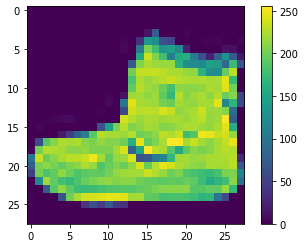

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images /255.0

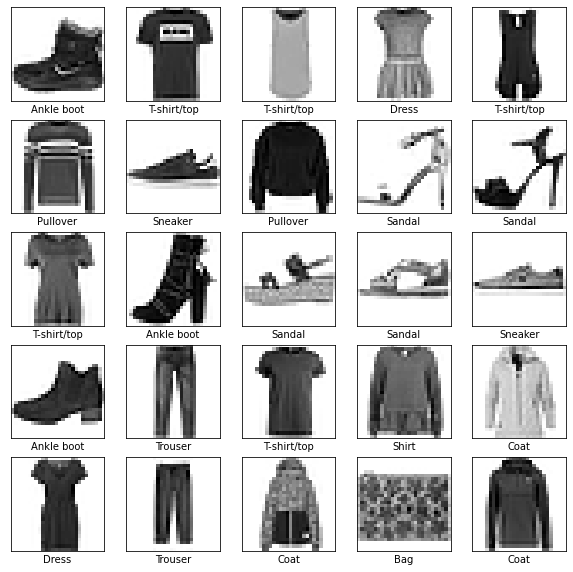

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [22]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
 132/1875 [=>............................] - ETA: 2s - loss: 0.3175 - accuracy: 0.8804

2021-12-24 19:40:07.270646: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 2s 1ms/step - loss: 0.3162 - accuracy: 0.8828
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3050 - accuracy: 0.8867
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2967 - accuracy: 0.8893
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2909 - accuracy: 0.8909
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2822 - accuracy: 0.8939
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2764 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2707 - accuracy: 0.8979
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2652 - accuracy: 0.9003
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2593 - accuracy: 0.9031
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2548 - accurac

In [26]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels, verbose=2)
print('Test accuracy: ', test_acc)

313/313 - 0s - loss: 0.3351 - accuracy: 0.8827
Test accuracy:  0.8827000260353088


In [27]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

predictions = probability_model.predict(test_images)

predictions[0]

array([3.2552555e-06, 2.8456704e-10, 9.5399921e-10, 9.7426664e-11,
       2.1022237e-10, 2.1239163e-02, 3.6292317e-08, 7.1939272e-03,
       1.2822591e-06, 9.7156233e-01], dtype=float32)

In [33]:
prediction = class_names[np.argmax(predictions[0])]

actual = class_names[test_labels[0]]

print(f'Prediction: {prediction}\nActual: {actual} \n{prediction == actual}')

Prediction: Ankle boot
Actual: Ankle boot 
True


In [38]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')    

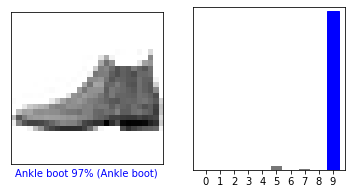

In [39]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

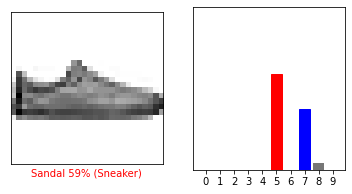

In [40]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


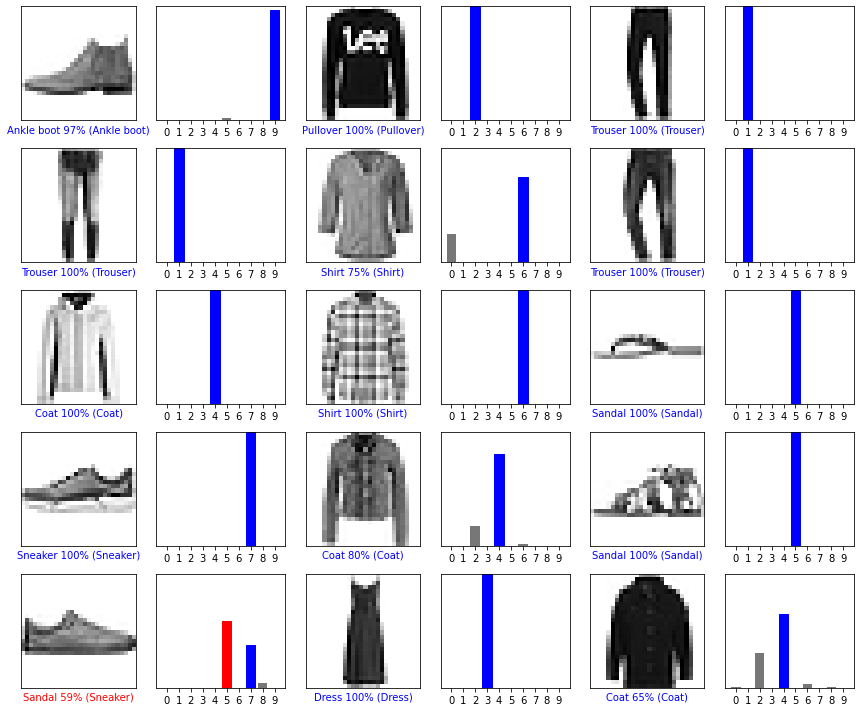

In [44]:
for i,item in enumerate(class_names):
    print(i,item)

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [45]:
img = test_images[1]

print(img.shape)

(28, 28)


In [46]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [48]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.93882401e-05 8.27838966e-18 9.99743283e-01 2.17216280e-11
  3.63228792e-05 1.40223755e-14 1.81089854e-04 1.97461014e-19
  7.44399713e-13 1.55039589e-14]]


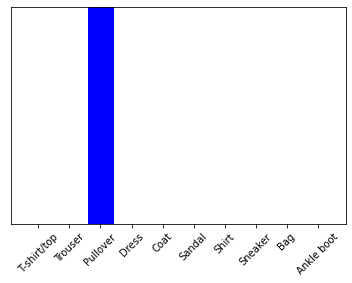

In [49]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [50]:
i = np.argmax(predictions_single[0])

print("Prediction: ", class_names[i])

Prediction:  Pullover
